In [19]:
import numpy as np
import theano
import keras
from matplotlib import pyplot as plt
%matplotlib inline

print("Numpy version: {}".format(np.__version__))
print("Theano version: {}".format(theano.__version__))
print("Keras version: {}".format(keras.__version__))

Numpy version: 1.13.3
Theano version: 0.9.0.dev-425cb8effc7958e8ca376b023d8344b7620a9622
Keras version: 2.1.2


In [20]:
# Load important packages and MNIST dataset from keras

# The model : Sequential, perfect for this type of feed-forward CNN
from keras.models import Sequential

# The "core" layers
from keras.layers import Dense, Dropout, Activation, Flatten

# The CNN layers 
from keras.layers import Conv2D, MaxPooling2D

# Utilities
from keras.utils import np_utils

# MNIST dataset is included in Keras Library
from keras.datasets import mnist

In [21]:
# The data is pre-shuffled
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data Viz

In [22]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Training set is composed of 60000 images, of size 28x28 pixels. Test set is composed of 10000 images of similar size.

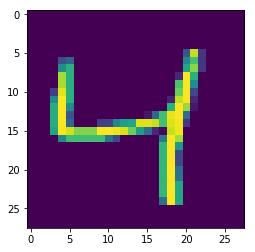

In [23]:
# Visualize one image of the set, that corresponds to a 4
plt.imshow(X_train[2])

# Data Preprocessing

In [24]:
# Preprocess train and test input sets

# With Theano, one has to declare the depth of the image
# For ex., 3 in RGB images, 1 here
# We should reshape from (n, width, height) to (n, depth, width, height)
n_train = X_train.shape[0]
n_test = X_test.shape[0]
depth = 1
height = X_train.shape[1] 
width = X_train.shape[1]

X_train_fit = X_train.reshape(n_train, depth, width, height)
X_test_fit = X_test.reshape(n_test, depth, width, height)

print(X_train_fit.shape)

# Convert and normalize data type to float32
X_train_fit = X_train_fit.astype('float32')/255
X_test_fit = X_test_fit.astype('float32')/255

(60000, 1, 28, 28)


In [25]:
# Preprocess class labels

# It should be in the form of a matrix with 10 columns (10 digits)
# With a 1 in the true label

Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)

print(Y_train.shape)

(60000, 10)


# Model Architecture

In [26]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1,28,28)))
model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling is a way to reduce # of parameters
# Slide a 2x2 pooling filter across the previous layer and take the max of the 4 values
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropout is a way to regularize
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model fit

In [28]:
model.fit(X_train_fit, Y_train, 
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.2035 - acc: 0.9377
Epoch 2/10
60000/60000 [==============================] - 190s 3ms/step - loss: 0.0871 - acc: 0.9735
Epoch 3/10
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0661 - acc: 0.9791
Epoch 4/10
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0526 - acc: 0.9839
Epoch 5/10
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0481 - acc: 0.9855
Epoch 6/10
60000/60000 [==============================] - 192s 3ms/step - loss: 0.0413 - acc: 0.9870
Epoch 7/10
60000/60000 [==============================] - 211s 4ms/step - loss: 0.0365 - acc: 0.9886
Epoch 8/10
60000/60000 [==============================] - 197s 3ms/step - loss: 0.0334 - acc: 0.9893
Epoch 9/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0305 - acc: 0.9903
Epoch 10/10
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0293 - a

# Model Evaluation

In [29]:
score = model.evaluate(X_test_fit, Y_test, verbose=0)
print("Accuracy: {}".format(score))

Accuracy: [0.02688332954113198, 0.99180000000000001]


Prediction for this image is: [  2.42639343e-15   9.13434519e-12   8.10528700e-10   9.72714242e-10
   6.49455804e-14   7.51572705e-16   1.43996328e-20   1.00000000e+00
   1.76759970e-14   1.56440438e-09]


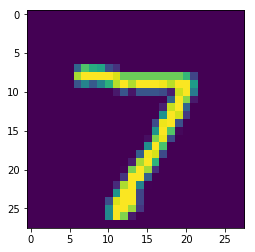

In [40]:
idx_image = 0
plt.imshow(X_test[idx_image])
X_test_fit.shape
print("Prediction for this image is: {}".format(model.predict(X_test_fit)[idx_image]))

#X_test_fit.shape